In [7]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.cluster import AgglomerativeClustering, DBSCAN

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing
import Rung as rung

import reverse_geocoder as rg
from datetime import datetime

plt.rcParams["figure.figsize"] = (20,10)
from scipy import signal

import eeweather
import feature_finder_keiko as ff

In [70]:
sst = Data('../../../nc/Cal_18912015.nc','precip', missing_value= -9.96921e+36)

result = sst.get_data()
lon_list = sst.get_lon_list()
lat_list = sst.get_lat_list()
lon = sst.get_lon()
lat = sst.get_lat()

In [21]:
lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

In [71]:
lon_list = np.array(lon_list)[index]
lat_list = np.array(lat_list)[index]

In [72]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})
df_sst["pc"] = 0

In [73]:
deg = np.zeros((len(lat),len(lon)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values.size == 0:
            deg[i,j] = 1
        else:
            deg[i,j]=np.nan

In [74]:
lon1 = np.arange(-125.75,-113.75,0.5)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


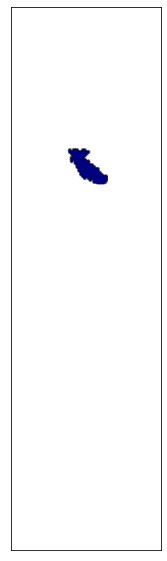

In [81]:
#map = Basemap(llcrnrlon=-140, llcrnrlat=-65,urcrnrlon=-100,urcrnrlat=80)


m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
#map = Basemap(projection='nplaea', boundinglat=40, lon_0=270)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, shading= 'gouraud',cmap=plt.cm.jet)
#cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.ax.tick_params(labelsize=25)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


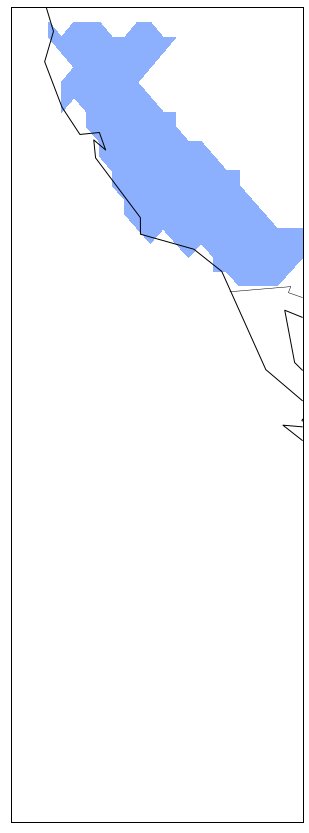

In [84]:
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min()-20,urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon1,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
#m.drawparallels(np.arange(-80.,81.,20.))
#m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
#plt.title("MAM", fontsize = 30)

In [51]:
i = 0
lon, lat = lon_list[i], lat_list[i]
if lon > 180: lon -= 360

In [52]:
ranked_stations = eeweather.rank_stations(lat, lon)
station, warnings = eeweather.select_station(ranked_stations)

In [53]:
class_list = []
for i in range(len(lon_list)):
    lon, lat = lon_list[i], lat_list[i]
    if lon > 180: lon -= 360
    ranked_stations = eeweather.rank_stations(lat, lon)
    station, warnings = eeweather.select_station(ranked_stations)
    class_list.append(ranked_stations.loc[station.usaf_id].ca_climate_zone)


In [54]:
np.isnan((np.array(class_list)))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [55]:
index = []
for i in range(len(class_list)):
    if class_list[i] is None:
        index.append(False)
    else:
        index.append(True)

In [56]:
class_list

[None,
 None,
 None,
 None,
 'CA_01',
 'CA_01',
 None,
 None,
 None,
 None,
 None,
 'CA_01',
 'CA_01',
 None,
 'CA_01',
 'CA_01',
 'CA_01',
 None,
 'CA_16',
 'CA_16',
 'CA_16',
 'CA_16',
 'CA_01',
 'CA_02',
 None,
 None,
 None,
 None,
 'CA_16',
 'CA_16',
 'CA_16',
 'CA_11',
 'CA_11',
 'CA_02',
 'CA_02',
 'CA_02',
 None,
 None,
 'CA_16',
 'CA_16',
 'CA_11',
 'CA_11',
 'CA_11',
 'CA_11',
 'CA_12',
 'CA_02',
 'CA_03',
 'CA_04',
 None,
 None,
 None,
 None,
 'CA_16',
 'CA_16',
 'CA_11',
 'CA_11',
 'CA_11',
 'CA_12',
 'CA_12',
 'CA_12',
 'CA_04',
 'CA_03',
 'CA_03',
 None,
 None,
 None,
 'CA_16',
 'CA_16',
 'CA_16',
 'CA_11',
 'CA_11',
 'CA_12',
 'CA_12',
 'CA_12',
 'CA_12',
 'CA_04',
 'CA_04',
 'CA_05',
 'CA_05',
 None,
 'CA_16',
 'CA_16',
 'CA_16',
 'CA_16',
 'CA_16',
 'CA_16',
 'CA_12',
 'CA_12',
 'CA_12',
 'CA_12',
 'CA_04',
 'CA_04',
 'CA_04',
 'CA_05',
 'CA_05',
 None,
 None,
 'CA_16',
 'CA_16',
 'CA_16',
 'CA_16',
 None,
 'CA_16',
 'CA_16',
 'CA_12',
 'CA_12',
 'CA_12',
 'CA_13',
 'CA

In [57]:
index

[False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 

In [58]:
result_new= result[:,index]

In [59]:
np.save("Cal_index.npy",index)

In [24]:
result = result

(1500, 351)

In [60]:
result_new.shape

(1500, 175)

In [61]:
r = result[:,index]

In [62]:
r[:,0]

matrix([[220.66],
        [362.11],
        [215.89],
        ...,
        [ 84.94],
        [262.48],
        [558.41]], dtype=float32)

In [19]:
result[:,index].shape

(1500, 175)

In [17]:
np.count_nonzero(np.array(index))

175

In [98]:
data = np.load("Cal_gamma_18912015.npy")

In [95]:
data = data[:,index]

In [99]:
data.shape

(1128, 175)

In [97]:
data = np.save("Cal_gamma_18912015.npy",data)